# Weather-API

#This program generates a random set of cities from around the globe and then calls the OpenWeatherMap API to get current #  # weather for as many cities as possible.  Temperature, Wind Speed, Relative Humidity and Cloudiness are plotted vs        # Latitude to determine if there is a correlation.  The location of all stations is plotted on a global map, plus the total # amount of sunsine is computed using sunset - sunrise times and ploted vs latitude as a sanity check. 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
import geopandas
import descartes
from shapely.geometry import Point,Polygon
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls


In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL

#url = f"{url}appid={api_key}&units={units}&q="
ncity=0       #  stores the index of the current city being processed
lats = []     # list to store latitudes
temps = []    # list to store Temperatures
humid = []    # list to store humidity
wind = []     # list to store wind speed
clouds = []   # listto store cloud cover
countries = [] # list to store country names
dates = []    # list to store date for observation
temps_max = [] # list to store max temps 
lngs = []      # list to store lognitudes
sunrises = []  # list to store the time of sunrise
sunsets = []   # list to store time of sunset

tcities = len(cities)  # total number of cities to be processed


# iterate over the list of cities from above
for city in cities:
    ncity+=1  # increment the city count
    print (f"Processing # {ncity} of {tcities} : {city}")
    query_url = f"{url}appid={api_key}&units={units}&q="  # set up query string
    response = requests.get(query_url + city).json()  # query the api and the wx for this city
#    print(response)

#  there are some cities that may be missing lat data so check to be sure the coord section is available
    if 'coord' in response:
      xlat = response['coord']['lat']
      xlon = response['coord']['lon']
    else:
      xlat=-9999
      xlon=-9999
#      lats.append(response['coord']['lat'])#
     
#  make sure the country and sunset and sunrise data are available
    if 'sys' in response:
        country = response['sys']['country']
        sunset = response['sys']['sunset']
        sunrise = response['sys']['sunrise']
        
#  make sure the main section containing the temperature, humidity and max temp is available.. if not set to missing    
    if 'main' in response:
      tmp = response['main']['temp']
      humd = response['main']['humidity']
      tmp_max = response['main']['temp_max']
    else:
      tmp = -9999
      humd = -9999
      tmp_max = -9999
#  check to see if wind data is present.. if not, set to missing        
    if 'wind' in response:
      wspd = response['wind']['speed']
    else:
      wpsd = -9999

#  check to see if cloud data is available... if not, set to missing            
    if 'clouds' in response:  
      clds = response['clouds']['all'] 
    else:
      clds = -9999        
            
#  check to see if date section is available.. if not, set to missing            
    if 'dt' in response:
        date = response['dt']
    else:
        date = -9999
            

#  if our report contains a valid date, latitude, temperature, humidity and wind speed, then process it
#  if not, then skip this report
#  note that some reports have only wind speed, so we will be skipping these and only process reports
#  with all the data we want


    if (date > -9999 and xlat > -9999 and tmp > -9999 and humd > -9999 and wspd > -9999 and clds > -9999):
      lats.append(xlat)
      lngs.append(xlon)
      temps.append(tmp)
      humid.append(humd)
      wind.append(wspd)
      clouds.append(clds)
      temps_max.append(tmp_max)
      countries.append(country) 
      dates.append(date)
      sunrises.append(sunrise)
      sunsets.append(sunset)        
                
    else:
      print (f"Something MIssing  lat:{xlat}  temp:{tmp}  humid:{humd}  wind:{wspd}  clouds{clds}")            
            


#  create a list of lists of all the variables so that we can ingest them into a dataframe      
ziplist = list(zip(lats,lngs,countries,dates,temps,humid,wind,clouds,temps_max,sunrises,sunsets))        

#  create a dataframe with all the data
df = pd.DataFrame(ziplist,columns=['Lat','Lon','Country','Date','Temp','Humidity','Wind Speed','Clouds','Temp Max','Sunrise','Sunset'])

# view our dataframe
df.head()
    
   

Processing # 1 of 640 : saint-philippe
Processing # 2 of 640 : hilo
Processing # 3 of 640 : sorland
Processing # 4 of 640 : komsomolskiy
Processing # 5 of 640 : victoria
Processing # 6 of 640 : baruun-urt
Processing # 7 of 640 : vernon
Processing # 8 of 640 : ngukurr
Something MIssing  lat:-9999  temp:-9999  humid:-9999  wind:5.1  clouds-9999
Processing # 9 of 640 : isangel
Processing # 10 of 640 : skagastrond
Something MIssing  lat:-9999  temp:-9999  humid:-9999  wind:6.2  clouds-9999
Processing # 11 of 640 : port-cartier
Processing # 12 of 640 : puerto leguizamo
Processing # 13 of 640 : punta arenas
Processing # 14 of 640 : mataura
Processing # 15 of 640 : kloulklubed
Processing # 16 of 640 : bagaces
Processing # 17 of 640 : barrow
Processing # 18 of 640 : solsvik
Something MIssing  lat:-9999  temp:-9999  humid:-9999  wind:6.2  clouds-9999
Processing # 19 of 640 : kodiak
Processing # 20 of 640 : nikolskoye
Processing # 21 of 640 : tarudant
Something MIssing  lat:-9999  temp:-9999  hu

Processing # 194 of 640 : romitan
Processing # 195 of 640 : paamiut
Processing # 196 of 640 : teberda
Processing # 197 of 640 : goderich
Processing # 198 of 640 : lavrentiya
Processing # 199 of 640 : grand river south east
Something MIssing  lat:-9999  temp:-9999  humid:-9999  wind:4.8  clouds-9999
Processing # 200 of 640 : khani
Processing # 201 of 640 : yasnyy
Processing # 202 of 640 : mildura
Processing # 203 of 640 : torbay
Processing # 204 of 640 : krasnogvardeyskiy
Processing # 205 of 640 : da lat
Processing # 206 of 640 : siniscola
Processing # 207 of 640 : koslan
Processing # 208 of 640 : sergeyevka
Processing # 209 of 640 : yanan
Something MIssing  lat:-9999  temp:-9999  humid:-9999  wind:2.08  clouds-9999
Processing # 210 of 640 : shihezi
Processing # 211 of 640 : fort saint john
Something MIssing  lat:-9999  temp:-9999  humid:-9999  wind:4.14  clouds-9999
Processing # 212 of 640 : myaundzha
Processing # 213 of 640 : bud
Processing # 214 of 640 : avera
Processing # 215 of 640

Processing # 383 of 640 : tabialan
Something MIssing  lat:-9999  temp:-9999  humid:-9999  wind:1.35  clouds-9999
Processing # 384 of 640 : dakar
Processing # 385 of 640 : kaitangata
Processing # 386 of 640 : oyama
Processing # 387 of 640 : shagonar
Processing # 388 of 640 : amahai
Processing # 389 of 640 : taoudenni
Processing # 390 of 640 : saint george
Processing # 391 of 640 : mahenge
Processing # 392 of 640 : evensk
Processing # 393 of 640 : maha sarakham
Processing # 394 of 640 : moengo
Processing # 395 of 640 : naryan-mar
Processing # 396 of 640 : nabire
Processing # 397 of 640 : harper
Processing # 398 of 640 : nueva loja
Processing # 399 of 640 : gizo
Processing # 400 of 640 : brownsville
Processing # 401 of 640 : nisia floresta
Processing # 402 of 640 : amga
Processing # 403 of 640 : margate
Processing # 404 of 640 : basco
Processing # 405 of 640 : port hedland
Processing # 406 of 640 : cooma
Processing # 407 of 640 : sioux lookout
Processing # 408 of 640 : warwick
Processing 

Processing # 583 of 640 : blind river
Processing # 584 of 640 : cap-aux-meules
Processing # 585 of 640 : sabang
Processing # 586 of 640 : gamba
Processing # 587 of 640 : ust-uda
Processing # 588 of 640 : san borja
Processing # 589 of 640 : belyy yar
Processing # 590 of 640 : varasti
Processing # 591 of 640 : calabozo
Processing # 592 of 640 : aklavik
Processing # 593 of 640 : bagdarin
Processing # 594 of 640 : mao
Processing # 595 of 640 : west wendover
Processing # 596 of 640 : macaboboni
Something MIssing  lat:-9999  temp:-9999  humid:-9999  wind:7.2  clouds-9999
Processing # 597 of 640 : porto de moz
Processing # 598 of 640 : mecca
Processing # 599 of 640 : prince george
Processing # 600 of 640 : minsk
Processing # 601 of 640 : laguna
Processing # 602 of 640 : coahuayana
Processing # 603 of 640 : skalistyy
Something MIssing  lat:-9999  temp:-9999  humid:-9999  wind:0.39  clouds-9999
Processing # 604 of 640 : yunjinghong
Something MIssing  lat:-9999  temp:-9999  humid:-9999  wind:0.3

,Lat,Lon,Country,Date,Temp,Humidity,Wind Speed,Clouds,Temp Max,Sunrise,Sunset
0,-21.36,55.77,RE,1597372747,16.98,64,1.50,90,20.00,1597372849,1597413753
1,19.73,-155.09,US,1597372747,23.08,58,3.60,90,28.00,1597334424,1597380599
2,67.67,12.69,NO,1597372747,12.87,83,5.48,100,12.87,1597372186,1597435091
3,40.43,71.72,UZ,1597372747,24.00,31,2.10,21,24.00,1597364590,1597414356
4,22.29,114.16,HK,1597372739,29.08,78,3.13,1,29.44,1597356024,1597402554


In [15]:
# Export data to a csv file in case we need to re-use or perform checks
df.to_csv("output_data/wx_data.csv",float_format='%f'.format())

In [16]:
# print out # of values in each column of our dataframe to be sure all reports are full
for xx in df:
  print (f"{xx} : {len(df['Temp'])}")

Lat : 581
Lon : 581
Country : 581
Date : 581
Temp : 581
Humidity : 581
Wind Speed : 581
Clouds : 581
Temp Max : 581
Sunrise : 581
Sunset : 581


# Plotting the Data

#### Latitude vs. Temperature Plot

C:\Users\Science Joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


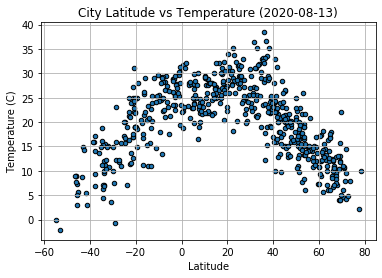

In [17]:
#  Plot the Temperature vs the latitude
# create the plot and send the the latitude and Temperature columns from our dataframe
tplot=df.plot(x='Lat',y='Temp',kind='scatter',marker="o",edgecolor='black')
#  add the X and Y axis lables
tplot.set_ylabel("Temperature (C)")
tplot.set_xlabel("Latitude")

# get the data for the observations... note that this is not the best way to do this as it is likely
# some of the data is for tomorrow and some for today (or today and yesterday) and our plots should
# likley contain 2 days... but I digress
idate = datetime.datetime.fromtimestamp(df['Date'].min())
#  add the title to the plot
tplot.set_title(f"City Latitude vs Temperature ({idate.date()})")
# turn on grid to match the HW plots
#  add a grid to the plot
tplot.grid('on', which='major', axis='x' )
tplot.grid('on', which='major', axis='y' )
# save plot to a file
fig=tplot.get_figure()
fig.savefig("temp.png")
fig.show()

#### Latitude vs. Humidity Plot

C:\Users\Science Joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


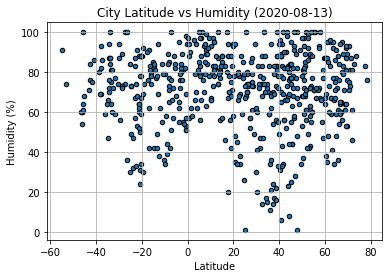

In [18]:
# create Humidty Plot
hplot = df.plot(x='Lat',y='Humidity',kind='scatter',marker="o",edgecolor='black')
# set x and y labels
hplot.set_ylabel("Humidity (%)")
hplot.set_xlabel("Latitude")
# get the date for this group of obs...  see note above about why this is not the best way to do this
idate = datetime.datetime.fromtimestamp(df['Date'].min())
# add title to the plot with the date
hplot.set_title(f"City Latitude vs Humidity ({idate.date()})")
# turn on grid to match the HW plots
hplot.grid('on', which='major', axis='x' )
hplot.grid('on', which='major', axis='y' )
# save plot to a png file
fig=hplot.get_figure()
fig.savefig("humidity.png")
fig.show()

#### Latitude vs. Cloudiness Plot

C:\Users\Science Joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


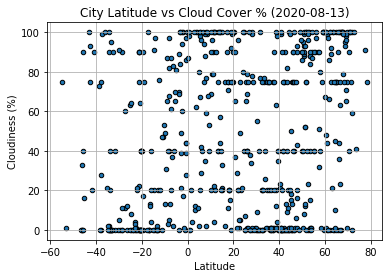

In [19]:
# plot the cloudiness data
cplot=df.plot(x='Lat',y='Clouds',kind='scatter',marker="o",edgecolor='black')
# lable the x and y lables
cplot.set_ylabel("Cloudiness (%)")
cplot.set_xlabel("Latitude")
# get the date for this group of obs...  see note above about why this is not the best way to do this
idate = datetime.datetime.fromtimestamp(df['Date'].min())
# add the title to the plot with the date
cplot.set_title(f"City Latitude vs Cloud Cover % ({idate.date()})")
# turn on grid to match the HW plots
cplot.grid('on', which='major', axis='x' )
cplot.grid('on', which='major', axis='y' )
# save cloud plot to png
fig=cplot.get_figure()
fig.savefig("cloud.png")
fig.show()

#### Latitude vs. Wind Speed Plot

C:\Users\Science Joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


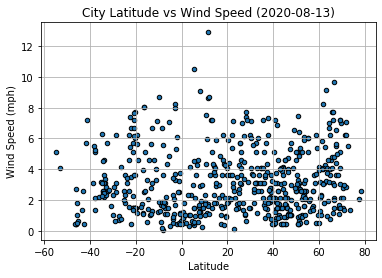

In [20]:
# plot the Wind Speed data
wsplot=df.plot(x='Lat',y='Wind Speed',kind='scatter',marker="o",edgecolor='black')
# label the x and y axes
wsplot.set_ylabel("Wind Speed (mph)")
wsplot.set_xlabel("Latitude")

# get the date for this group of obs...  see note above about why this is not the best way to do this
idate = datetime.datetime.fromtimestamp(df['Date'].min())
#  add the titles to the plot with the date
wsplot.set_title(f"City Latitude vs Wind Speed ({idate.date()})")
# turn on grid to match the HW plots
wsplot.grid('on', which='major', axis='x' )
wsplot.grid('on', which='major', axis='y' )
# save wind plot to png
fig=wsplot.get_figure()
fig.savefig("wind.png")
fig.show()

<h1>Plot location of all stations</h1>

Text(0.5, 1, 'Location of Stations from Weather Feed (2020-08-13)')

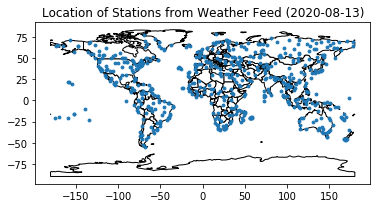

In [21]:
###  I wanted to check and see where all the stations were... so this section
###  shows where all the stations are located... this i sa good check of 
###  the integrity of the data

#  create a map of the world
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(
    color='white', edgecolor='black')


#  get all the lats and lons of the stations so we can plot them
geometry = [Point(xy) for xy in zip(df['Lon'],df['Lat'])]
#  convert the lat-lon points to a geometry data frame
geo_df = geopandas.GeoDataFrame(df,geometry=geometry)

# now plot the locations onto top of the word map, which is passed in in ax
stns = geo_df.plot(ax=ax,markersize=8)
# get the date
idate = datetime.datetime.fromtimestamp(df['Date'].min())
# add title
stns.set_title(f"Location of Stations from Weather Feed ({idate.date()})")


## Plot Amount of Sunlight vs Latitude

Text(0, 0.5, 'Amount of Daylight (Minutes)')

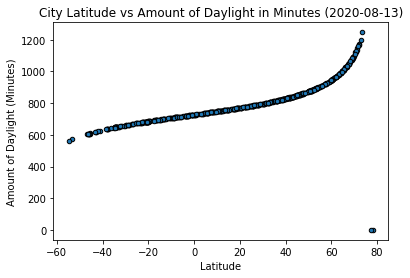

In [22]:
###  I stored the sunrise and sunset for each city so that I could compute
###  the total amount of sunlight for each station, then plot that vs Latitude
###  This is a cool plot and also another check of the data integrity


#  This functions takes the two integer time stamps and computes the number of
#  minutes between the 2 
def timeDiff(row):

# some stations have a sunrise and sunset of 0 because the sun is always above
# or below the horizon
    if (row['Sunrise'] > 0 and row['Sunset'] > 0):
#  Convert the integer sunrise and sunset to actual date-time variables
        rise = datetime.datetime.fromtimestamp(row['Sunrise'])
        set  = datetime.datetime.fromtimestamp(row['Sunset'])
        fmt = '%Y-%m-%d %H:%M:%S'
#  This converts to date/time objects        
        d1 = datetime.datetime.strptime(str(rise), fmt)
        d2 = datetime.datetime.strptime(str(set), fmt)
#  compute the number of minutes between the two dates
        diff = d2 -d1
        return ((diff.days * 24 * 60) + (diff.seconds/60))  
    
    else:
        return (0)

#  create a column which stores the number of minutes of daylight for each city
df['LOD'] = df.apply(timeDiff,axis=1)
#  plot the number of minuted against latitude
lodplot=df.plot(x='Lat',y='LOD',kind='scatter',marker="o",edgecolor='black')

#  ad the axes lables and title
idate = datetime.datetime.fromtimestamp(df['Date'].min())
lodplot.set_title(f"City Latitude vs Amount of Daylight in Minutes ({idate.date()})")
lodplot.set_xlabel("Latitude")
lodplot.set_ylabel("Amount of Daylight (Minutes)")

